In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import xlrd

Step 1: read in data from the .xls file

In [2]:
DATA_FILE = '../data/fire_theft.xls'

book = xlrd.open_workbook(DATA_FILE, encoding_override="utf-8")
sheet = book.sheet_by_index(0)
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])
n_samples = sheet.nrows - 1

Step 2: create placeholders for input X (number of fire) and label Y (number of theft)

In [3]:
X = tf.placeholder(tf.float32, name="X")
Y = tf.placeholder(tf.float32, name="Y")

Step 3: create weight and bias, initialized to 0

In [4]:
w = tf.Variable(0.0, name='w')
b = tf.Variable(0.0, name='b')

Step 4: build model to predict Y

In [5]:
Y_predicted = w * X + b

Step 5: use the square error as the loss function

In [6]:
loss = tf.square(Y - Y_predicted)

Step 5a: implement Huber loss function from lecture and try it out

In [7]:
def huber_loss(labels, predictions, delta=1.0):
    residual = tf.abs(predictions - labels)
    condition = tf.less(residual, delta)
    small_res = 0.5 * tf.square(residual)
    large_res = delta * residual - 0.5 * tf.square(delta)

    return tf.where(condition, small_res, large_res)

Step 6: using gradient descent with learning rate of 0.01 to minimize loss

In [8]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

In [9]:
sess = tf.Session() # prefer with tf.Session() as sess: in your code

Step 7: initialize the necessary variables, in this case, w and b

In [10]:
sess.run(tf.global_variables_initializer())
writer = tf.summary.FileWriter('./graphs/linear_reg', sess.graph)

Step 8: train the model

In [11]:
for i in range(50): # train the model 50 epochs
    total_loss = 0
    for x, y in data:
        # Session runs train_op and fetch values of loss
        _, l = sess.run([optimizer, loss], feed_dict={X:x, Y:y})
        total_loss += l
    print('Epoch {0}: {1}'.format(i, total_loss/float(n_samples)))

# close the writer when you're done using it
writer.close() 

Epoch 0: 2069.632077968724
Epoch 1: 2117.0124027045676
Epoch 2: 2092.302715009167
Epoch 3: 2068.508299712269
Epoch 4: 2045.59097691377
Epoch 5: 2023.51466578529
Epoch 6: 2002.2447984701112
Epoch 7: 1981.7480356388148
Epoch 8: 1961.9942731161912
Epoch 9: 1942.9520601381857
Epoch 10: 1924.5930879137345
Epoch 11: 1906.8898473151382
Epoch 12: 1889.8164801984317
Epoch 13: 1873.347572792144
Epoch 14: 1857.4589788810838
Epoch 15: 1842.1277029727187
Epoch 16: 1827.3322633700002
Epoch 17: 1813.052086790048
Epoch 18: 1799.2660774976082
Epoch 19: 1785.9562136753016
Epoch 20: 1773.1024838801738
Epoch 21: 1760.6891868668124
Epoch 22: 1748.6984040662203
Epoch 23: 1737.1138700809595
Epoch 24: 1725.9208882119883
Epoch 25: 1715.1045996287653
Epoch 26: 1704.6503852187864
Epoch 27: 1694.5447281878164
Epoch 28: 1684.774640512564
Epoch 29: 1675.3281234368194
Epoch 30: 1666.1934701423827
Epoch 31: 1657.35837137096
Epoch 32: 1648.8119148027063
Epoch 33: 1640.5438601484611
Epoch 34: 1632.5446351634428
Epoch 3

Step 9: output the values of w and b

In [12]:
w_res, b_res = sess.run([w, b])
print(w_res, b_res)

1.99747 12.5687


Step 10: plot the results

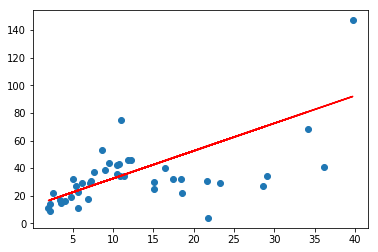

In [13]:
X_data, Y_data = data[:, 0], data[:, 1]
plt.scatter(X_data, Y_data, label="Real data")
plt.plot(X_data, w_res * X_data + b_res, label="Predicted data", color='r')
plt.show()

In [14]:
sess.close()

### With huber loss function

In [15]:
def huber_loss(labels, predictions, delta=1.0):
    residual = tf.abs(predictions - labels)
    condition = tf.less(residual, delta)
    small_res = 0.5 * tf.square(residual)
    large_res = delta * residual - 0.5 * tf.square(delta)

    return tf.where(condition, small_res, large_res)

In [16]:
X = tf.placeholder(tf.float32, name="X")
Y = tf.placeholder(tf.float32, name="Y")

In [17]:
w = tf.Variable(0.0, name='w')
b = tf.Variable(0.0, name='b')

In [18]:
Y_predicted = w * X + b

In [19]:
loss = huber_loss(Y, Y_predicted)

In [20]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(loss)

In [21]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    writer = tf.summary.FileWriter('./graphs/linear_reg_huber', sess.graph)
    
    for i in range(50): # train the model 50 epochs
        total_loss = 0
        for x, y in data:
            # Session runs train_op and fetch values of loss
            _, l = sess.run([optimizer, loss], feed_dict={X:x, Y:y})
            total_loss += l
        print('Epoch {0}: {1}'.format(i, total_loss/float(n_samples)))

    # close the writer when you're done using it
    writer.close() 

    w_huber, b_huber = sess.run([w, b])

Epoch 0: 20.78248843943168
Epoch 1: 17.50859196980794
Epoch 2: 17.430589585077193
Epoch 3: 17.352587438765028
Epoch 4: 17.274585337865922
Epoch 5: 17.19658308937436
Epoch 6: 17.11858055705116
Epoch 7: 17.040578456152055
Epoch 8: 16.962575708116805
Epoch 9: 16.88457341421218
Epoch 10: 16.806571290606545
Epoch 11: 16.72856893993559
Epoch 12: 16.650566611971175
Epoch 13: 16.57189205430803
Epoch 14: 16.492146255004975
Epoch 15: 16.413320147565432
Epoch 16: 16.303213673688116
Epoch 17: 16.163562368069375
Epoch 18: 16.1193766088358
Epoch 19: 15.898681734466837
Epoch 20: 16.000069199296245
Epoch 21: 15.550617702504885
Epoch 22: 15.847922120775495
Epoch 23: 15.378736067408076
Epoch 24: 15.718447928272543
Epoch 25: 15.079710493662528
Epoch 26: 15.622703626815651
Epoch 27: 15.032802624450554
Epoch 28: 15.48331672064073
Epoch 29: 14.70006587019279
Epoch 30: 15.408374920842194
Epoch 31: 14.95937854227876
Epoch 32: 14.974695943650746
Epoch 33: 14.653287975738445
Epoch 34: 15.151982988630023
Epoch 3

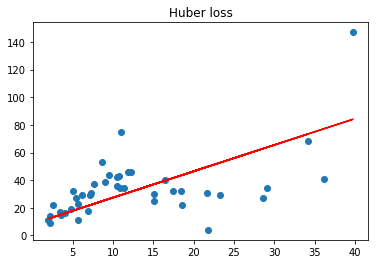

In [22]:
X_data, Y_data = data[:, 0], data[:, 1]
plt.scatter(X_data, Y_data, label="Real data")
plt.plot(X_data, w_huber * X_data + b_huber, label="Predicted data", color='r')
plt.title('Huber loss')
plt.show()